# Visualización

Los árboles de decisión son muy fáciles de visualizar e interpretar:

In [ ]:
pip install scikit-learn==1.1### When need

In [1]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the Boston Housing Dataset
boston = load_boston()

# Select only one predictor variable
X = boston.data[:, 5]
y = boston.target

# Sort the data by X
idx = X.argsort()
X = X[idx]
y = y[idx]

# Fit a decision tree with max depth of 1
dt1 = DecisionTreeRegressor(max_depth=1)
dt1.fit(X.reshape(-1, 1), y)

# Fit a decision tree with max depth of 5
dt5 = DecisionTreeRegressor(max_depth=5)
dt5.fit(X.reshape(-1, 1), y)

# Plot the decision trees
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_tree(dt1, ax=ax[0], filled=True, feature_names=['X'])
ax[0].set_title("Decision tree with max depth of 1")
plot_tree(dt5, ax=ax[1], filled=True, feature_names=['X'])
ax[1].set_title("Decision tree with max depth of 5")
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# Explicabilidad

Igualmente, es fácil explicar por qué una observación es clasificada de cierta manera por un árbol de decisión:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
   
# Load the iris dataset
iris = load_iris()

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(iris.data, iris.target)

# Plot the decision tree
plt.figure(figsize=(15,8))
plot_tree(clf, fontsize=10, feature_names=iris.feature_names)
plt.show()

In [ ]:
# Function to explain why an observation is classified in a certain way
def explanation_prediction(clf, observation):
    # Traverse the decision tree to explain the prediction for the observation
    node_index = 0
    while clf.tree_.children_left[node_index] != -1:
        feature_index = clf.tree_.feature[node_index]
        threshold = clf.tree_.threshold[node_index]
        if observation[0][feature_index] <= threshold:
            node_index = clf.tree_.children_left[node_index]
            print(f"Go to node {node_index}: {iris.feature_names[feature_index]} <= {threshold}")
        else:
            node_index = clf.tree_.children_right[node_index]
            print(f"Go to node {node_index}: {iris.feature_names[feature_index]} > {threshold}")

    # Print the predicted class for the observation
    prediction = clf.predict(observation)[0]
    print(f"The observation {observation[0]} is predicted to be in class {iris.target_names[prediction]}")


# Define an observation to explain the prediction for
observation = [[0.1, 3.6, 1.4, 4.5]] # this is a new observation for which we want to explain the prediction
explanation_prediction(clf, observation)

# Overfitting:

Modelos de árboles pueden hacer overfitting de los datos muy fácilmente. Son propensos a hacer overfitting en particular con hiperparámetros como la profundidad del árbol o el mínimo de observaciones en cada nodo terminal.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the Boston Housing Dataset
boston = load_boston()

# Select only one predictor variable
X = boston.data[:, 5]
y = boston.target

# Sort the data by X
idx = X.argsort()
X = X[idx]
y = y[idx]

# Set max_depth values for decision tree
max_depths = [2, 5, 10]

# Create scatter plot of real values and decision tree graphs
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

for i, depth in enumerate(max_depths):
    # Fit a decision tree with current max_depth value
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X.reshape(-1, 1), y)
    y_pred = dt.predict(X.reshape(-1, 1))
    # Plot the decision tree graph
    axs[i].scatter(X, y, alpha=0.5, label='Real Values')
    axs[i].plot(X, y_pred, color='red', label=f'Predicted Values (max depth = {depth})')
    axs[i].set_xlabel('Predictor Variable')
    axs[i].set_ylabel('Target Variable')
    axs[i].set_title(f'Max Depth = {depth}')
    axs[i].legend()

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)
y_pred_reg = reg.predict(X.reshape(-1, 1))

# Plot for linear regression
axs[-1].scatter(X, y, alpha=0.5, label='Real Values')
axs[-1].plot(X, y_pred_reg, color='red', label='Predicted Values (Linear Regression)')
axs[-1].set_xlabel('Predictor Variable')
axs[-1].set_ylabel('Target Variable')
axs[-1].set_title('Linear Regression')
axs[-1].legend()

plt.show()


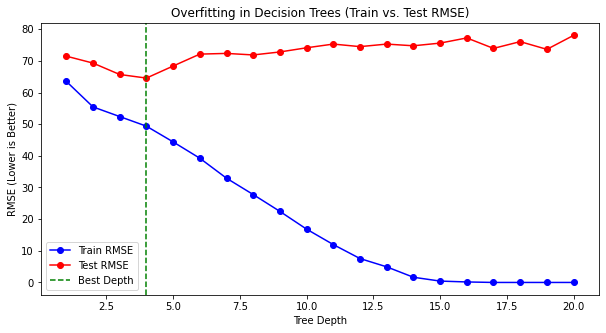

In [22]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load dataset
data = load_diabetes()
X = data.data  # Use all features
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Range of depths to test
depths = range(1, 21)

# Store RMSE scores
train_rmse = []
test_rmse = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    # Compute RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, dt.predict(X_train))))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

# Plot training vs. test RMSE
plt.figure(figsize=(10, 5))
plt.plot(depths, train_rmse, marker='o', label="Train RMSE", color='blue')
plt.plot(depths, test_rmse, marker='o', label="Test RMSE", color='red')

plt.xlabel("Tree Depth")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Overfitting in Decision Trees (Train vs. Test RMSE)")
plt.axvline(x=np.argmin(test_rmse) + 1, color="green", linestyle="--", label="Best Depth")
plt.legend()
plt.show()


# Cambios en árbol con distintos datos

Los árboles de decisión pueden cambiar bastante si se cambia el conjunto de entrenamiento de los datos:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features for visualization
y = iris.target

# Define colors for each class
colors = ['blue', 'red', 'green']
cmap = ListedColormap(colors)

# Train two decision tree classifiers on slightly different training sets
tree1 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree1.fit(X[:75], y[:75])

tree2 = DecisionTreeClassifier(max_depth=2, random_state=1)
tree2.fit(X[25:], y[25:])

# Plot the decision boundaries of the two trees
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, tree in enumerate([tree1, tree2]):
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label=iris.target_names[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], c='red', label=iris.target_names[1])
    ax[i].scatter(X[y == 2, 0], X[y == 2, 1], c='green', label=iris.target_names[2])
    ax[i].set_xlabel(iris.feature_names[0])
    ax[i].set_ylabel(iris.feature_names[1])
    ax[i].legend()

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

n_samples = 10000

# Generate a classification dataset with 2 features and 500 samples
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2,
                            n_redundant=0, n_classes=2, random_state=0)

# Train two decision tree classifiers on slightly different training sets
tree1 = DecisionTreeClassifier(max_depth=5, random_state=0)
tree1.fit(X[:int(0.75*n_samples)], y[:int(0.75*n_samples)])

tree2 = DecisionTreeClassifier(max_depth=5, random_state=1)
tree2.fit(X[int(0.25*n_samples):], y[int(0.25*n_samples):])

# Plot the training data and the decision boundaries of the two trees
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, tree in enumerate([tree1, tree2]):
    xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-6, 6, 100))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=20, edgecolors='k', alpha=0.05)
    ax[i].set_title(f"Tree {i+1}")

plt.show()


# Outliers

Los árboles de decisión no cambian mucho si las variables predictivas son más o menos extremas. Es decir, si a un punto que está siendo enviado a la rama derecha de un árbol de acuerdo a la variable X se le aumenta el valor a X, el árbol no cambia en absolutamente nada:

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Modify the dataset by multiplying the most extreme observations on the first independent variable by a large number
multiplier = 1000
X_modified = iris.data.copy()
X_modified[np.argmax(X_modified[:, 0]), 0] *= multiplier
X_modified[np.argmin(X_modified[:, 0]), 0] *= multiplier

# Create a decision tree classifier with the modified dataset
clf_modified = DecisionTreeClassifier(random_state=0)
clf_modified.fit(X_modified, iris.target)

# Create a decision tree classifier with the original dataset
clf = DecisionTreeClassifier(random_state=0)
clf.fit(iris.data, iris.target)

# Plot the decision trees side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
plot_tree(clf_modified, fontsize=10, ax=axs[0])
axs[0].set_title("With modified dataset")
plot_tree(clf, fontsize=10, ax=axs[1])
axs[1].set_title("With original dataset")

plt.show()

Las predicciones tampoco cambian mucho si hay outliers en la variable de resultado. La razón es que cambios en la variable de resultado probablemente cambiarán un poco la predicción en la hoja donde cae esa observación (y pueden cambiar también el árbol entero), pero los cambios suelen ser moderados comparados con modelos paramétricos, como una regresión lineal:

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Introduce outliers in the target variable
y_modified = y.copy()
y_modified[np.argmax(X[:, 0])] = 10000  # Extreme high value
y_modified[np.argmin(X[:, 0])] = -10000  # Extreme low value

# Train models with the original target variable
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X, y)

lr = LinearRegression()
lr.fit(X, y)

# Train models with the modified target variable
dt_reg_modified = DecisionTreeRegressor(max_depth=5)
dt_reg_modified.fit(X, y_modified)

lr_modified = LinearRegression()
lr_modified.fit(X, y_modified)

# Generate a large test dataset (5000 samples)
np.random.seed(42)
X_test = X[np.random.choice(X.shape[0], 5000, replace=True)]

# Predict using both models
y_pred_dt_original = dt_reg.predict(X_test)
y_pred_dt_modified = dt_reg_modified.predict(X_test)

y_pred_lr_original = lr.predict(X_test)
y_pred_lr_modified = lr_modified.predict(X_test)

# Compute percentage of similar predictions (tolerance < 1)
match_percentage_dt = np.mean(np.abs(y_pred_dt_original - y_pred_dt_modified) < 1) * 100
match_percentage_lr = np.mean(np.abs(y_pred_lr_original - y_pred_lr_modified) < 1) * 100

# Print results
print("\nModel Robustness to Outliers:")
print(f"Decision Tree (max_depth=5) - Similar Predictions: {match_percentage_dt:.2f}%")
print(f"Linear Regression - Similar Predictions: {match_percentage_lr:.2f}%")



Model Robustness to Outliers:
Decision Tree (max_depth=5) - Similar Predictions: 99.06%
Linear Regression - Similar Predictions: 17.60%


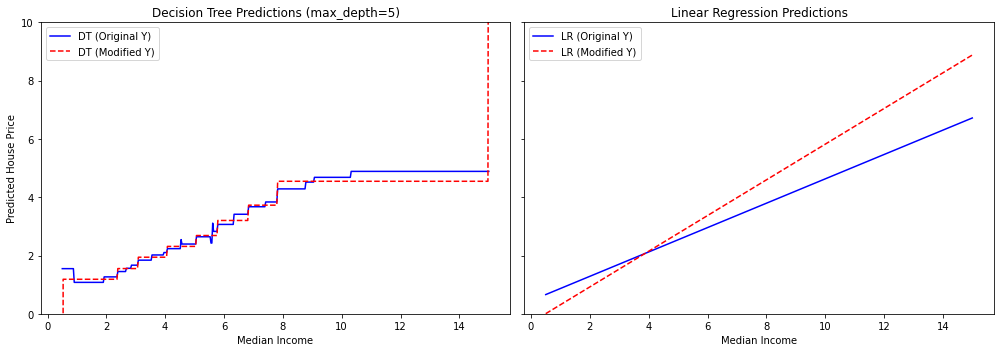

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Use median income as the single feature for visualization
X_feature = X[:, 0].reshape(-1, 1)

# Introduce outliers in the target variable
y_modified = y.copy()
y_modified[np.argmax(X_feature)] = 1000
y_modified[np.argmin(X_feature)] = -1000

# Limit tree depth to avoid overfitting
tree_depth = 5

# Train Decision Tree Regressors (original and modified y)
dt_original = DecisionTreeRegressor(max_depth=tree_depth, random_state=0)
dt_original.fit(X_feature, y)

dt_modified = DecisionTreeRegressor(max_depth=tree_depth, random_state=0)
dt_modified.fit(X_feature, y_modified)

# Train Linear Regressors (original and modified y)
lr_original = LinearRegression()
lr_original.fit(X_feature, y)

lr_modified = LinearRegression()
lr_modified.fit(X_feature, y_modified)

# Generate predictions
X_test = np.linspace(X_feature.min(), X_feature.max(), 500).reshape(-1, 1)

y_pred_dt_original = dt_original.predict(X_test)
y_pred_dt_modified = dt_modified.predict(X_test)

y_pred_lr_original = lr_original.predict(X_test)
y_pred_lr_modified = lr_modified.predict(X_test)

# Fixed Y-axis range
y_min = 0
y_max = 10

# Plot the predictions only
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Decision Tree Predictions
axs[0].plot(X_test, y_pred_dt_original, color='blue', label="DT (Original Y)")
axs[0].plot(X_test, y_pred_dt_modified, color='red', linestyle='dashed', label="DT (Modified Y)")
axs[0].set_title(f"Decision Tree Predictions (max_depth={tree_depth})")
axs[0].set_xlabel("Median Income")
axs[0].set_ylabel("Predicted House Price")
axs[0].set_ylim(y_min, y_max)
axs[0].legend()

# Linear Regression Predictions
axs[1].plot(X_test, y_pred_lr_original, color='blue', label="LR (Original Y)")
axs[1].plot(X_test, y_pred_lr_modified, color='red', linestyle='dashed', label="LR (Modified Y)")
axs[1].set_title("Linear Regression Predictions")
axs[1].set_xlabel("Median Income")
axs[1].set_ylim(y_min, y_max)
axs[1].legend()

plt.tight_layout()
plt.show()


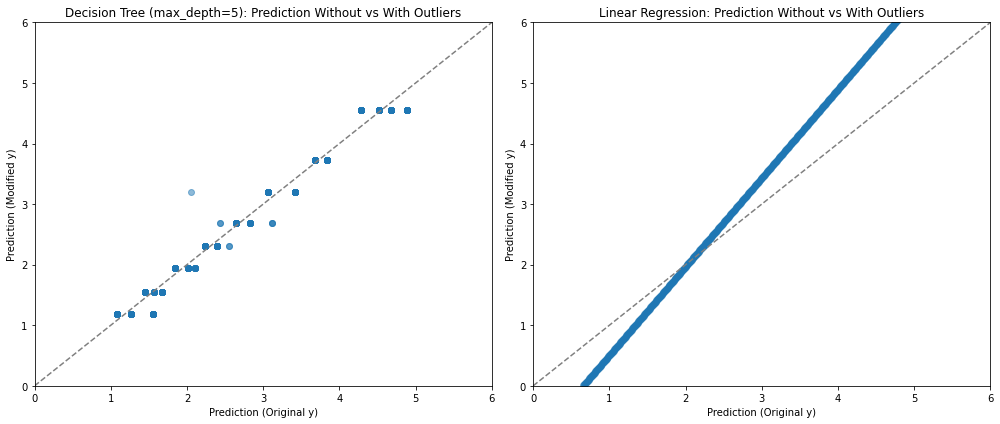

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Use median income (feature 0)
X_feature = X[:, 0].reshape(-1, 1)

# Introduce extreme outliers in y
y_modified = y.copy()
y_modified[np.argmax(X_feature)] = 1000
y_modified[np.argmin(X_feature)] = -1000

# Train models with depth limitation for tree
dt_original = DecisionTreeRegressor(max_depth=5, random_state=0)
dt_original.fit(X_feature, y)

dt_modified = DecisionTreeRegressor(max_depth=5, random_state=0)
dt_modified.fit(X_feature, y_modified)

lr_original = LinearRegression()
lr_original.fit(X_feature, y)

lr_modified = LinearRegression()
lr_modified.fit(X_feature, y_modified)

# Predict on a range of values
X_test = np.linspace(X_feature.min(), X_feature.max(), 1000).reshape(-1, 1)

y_pred_dt_orig = dt_original.predict(X_test)
y_pred_dt_mod = dt_modified.predict(X_test)

y_pred_lr_orig = lr_original.predict(X_test)
y_pred_lr_mod = lr_modified.predict(X_test)

# Plot: prediction without vs with outliers
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 45-degree line reference
min_val = 0
max_val = 6
line = np.linspace(min_val, max_val, 100)

# Decision Tree
axs[0].scatter(y_pred_dt_orig, y_pred_dt_mod, alpha=0.5)
axs[0].plot(line, line, color='gray', linestyle='--')
axs[0].set_title("Decision Tree (max_depth=5): Prediction Without vs With Outliers")
axs[0].set_xlabel("Prediction (Original y)")
axs[0].set_ylabel("Prediction (Modified y)")
axs[0].set_xlim(min_val, max_val)
axs[0].set_ylim(min_val, max_val)

# Linear Regression
axs[1].scatter(y_pred_lr_orig, y_pred_lr_mod, alpha=0.5)
axs[1].plot(line, line, color='gray', linestyle='--')
axs[1].set_title("Linear Regression: Prediction Without vs With Outliers")
axs[1].set_xlabel("Prediction (Original y)")
axs[1].set_ylabel("Prediction (Modified y)")
axs[1].set_xlim(min_val, max_val)
axs[1].set_ylim(min_val, max_val)

plt.tight_layout()
plt.show()


# Extrapolation

Los árboles de decisión son malos para extrapolar:

In [12]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data with a quadratic relationship
np.random.seed(42)
x_train = np.linspace(0, 10, 100)
y_train = x_train**2 + np.random.normal(0, 20, size=100)

# Fit a decision tree to the training data
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(x_train.reshape(-1, 1), y_train)

# Create plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the training data and the decision tree prediction
x_test = np.linspace(-2, 12, 1000)
y_test = x_test**2
y_pred = tree.predict(x_test.reshape(-1, 1))
ax[0].scatter(x_train, y_train, label='Training Data')
ax[0].plot(x_test, y_pred, label='Decision Tree Prediction', color='red')
ax[0].plot(x_test, y_test, label='True Function')
ax[0].legend()

x_test = np.linspace(-5, 30, 1000)
y_test = x_test**2
y_pred = tree.predict(x_test.reshape(-1, 1))
ax[1].scatter(x_train, y_train, label='Training Data')
ax[1].plot(x_test, y_pred, label='Decision Tree Prediction', color='red')
ax[1].plot(x_test, y_test, label='True Function')
ax[1].legend()

plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features for visualization
y = iris.target

# Train two decision tree classifiers on slightly different training sets
tree1 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree1.fit(X[25:], y[25:])

# Plot the decision boundaries of the two trees
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
multipliers = [1, 6, 20]

for i in range(3):
    x_min, x_max = X[:, 0].min() - 0.5*multipliers[i], X[:, 0].max() + 0.5*multipliers[i]
    y_min, y_max = X[:, 1].min() - 0.5*multipliers[i], X[:, 1].max() + 0.5*multipliers[i]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = tree1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax[i].contourf(xx, yy, Z, alpha=0.4)
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label=iris.target_names[0])
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], c='red', label=iris.target_names[1])
    ax[i].scatter(X[y == 2, 0], X[y == 2, 1], c='green', label=iris.target_names[2])
    ax[i].set_xlabel(iris.feature_names[0])
    ax[i].set_ylabel(iris.feature_names[1])
    ax[i].legend()

plt.show()


# Variance of estimators

In [14]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the Boston housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# Create 100 decision trees and bagging regressors
tree_preds = []
bagging_preds = []

for i in range(200):
    # Resample the data with replacement to create a bootstrap sample
    bootstrap_indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
    X_boot = X.loc[bootstrap_indices]
    y_boot = y.loc[bootstrap_indices]

    tree = DecisionTreeRegressor(max_depth=4)
    tree.fit(X_boot, y_boot)
    tree_preds.append(tree.predict([X.iloc[0]])[0])

    bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100)
    bag.fit(X_boot, y_boot)
    bagging_preds.append(bag.predict([X.iloc[0]])[0])

# Set the same bin edges for both histograms
bin_edges = np.linspace(min(tree_preds + bagging_preds), max(tree_preds + bagging_preds), 21)

# Plot histograms of the predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(tree_preds, bins=bin_edges)
ax1.set_title('Decision Tree Predictions')
ax1.set_xlim(bin_edges[0], bin_edges[-1])

ax2.hist(bagging_preds, bins=bin_edges)
ax2.set_title('Bagging Regressor Predictions (100 trees)')
ax2.set_xlim(bin_edges[0], bin_edges[-1])

plt.show()


# Computational Complexity

Dataset size: 10000.
Dataset size: 110000.
Dataset size: 210000.
Dataset size: 310000.
Dataset size: 410000.
Dataset size: 510000.
Dataset size: 610000.
Dataset size: 710000.
Dataset size: 810000.
Dataset size: 910000.
Dataset size: 1010000.


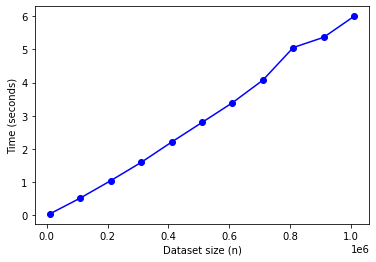

In [15]:
import numpy as np
import time
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define range of dataset sizes to test
sizes = np.linspace(10000, 1010000, num=11, dtype=int)

# Initialize empty lists to store results
times = []
complexity = []

# Loop through dataset sizes and measure time to fit a decision tree
for n in sizes:
    print(f"Dataset size: {n}.")
    # Generate simulated dataset
    X = np.random.rand(n, 10)
    y = np.random.rand(n)

    # Fit decision tree and measure time
    start_time = time.time()
    model = DecisionTreeRegressor(max_depth=5)
    model.fit(X, y)
    end_time = time.time()
    times.append(end_time - start_time)
    complexity.append(n)

# Plot results
plt.plot(complexity, times, 'bo-')
plt.xlabel('Dataset size (n)')
plt.ylabel('Time (seconds)')
plt.show()
